# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# tip from class: insert <time.sleep(1.1)> in last line of try statement to help with the blocking issue
# http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=f94379069587070183b98681ae5fd990

#just testing base and query urls to make sure they work
base_url = "http://api.openweathermap.org/data/2.5/weather"
# query_url = base_url + "?q=" + city + "&appid=" + weather_api_key
# query_url

#setting counters for the record and set as in data window below
record = 1
sets = 1

#creating df and adding blank columns
city_weather_df = pd.DataFrame({"City": cities})

city_weather_df["Lat"] = ""
city_weather_df["Long"] = ""
city_weather_df["Max Temp"] = ""
city_weather_df["Humidity"] = ""
city_weather_df["Cloudiness"] = ""
city_weather_df["Wind speed"] = ""
city_weather_df["Country"] = ""
city_weather_df["Date"] = ""

#beginning for loop
print("Beginning data retrieval")
print("------------------------")

for index, row in city_weather_df.iterrows():
    
    city = row["City"]
    query_url = base_url + "?q=" + city + "&appid=" + weather_api_key
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing record {record} of Set {sets} | {city}")
        
        city_weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        city_weather_df.loc[index, "Long"] = response["coord"]["lon"]
        city_weather_df.loc[index, "Max Temp"] = 1.8 * (response["main"]["temp_max"] - 273) + 32
        city_weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        city_weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_weather_df.loc[index, "Wind speed"] = response["wind"]["speed"]
        city_weather_df.loc[index, "Country"] = response["sys"]["country"]
        city_weather_df.loc[index, "Date"] = response["dt"]
        
    except:
        print("city not found. skipping...")
        
    time.sleep(1.1)
    
    record = record + 1
    if record == 50:
        record = 1
        sets = sets + 1
        
print("-----------------------")
print("data retrieval complete")

Beginning data retrieval
------------------------
Processing record 1 of Set 1 | bluff
Processing record 2 of Set 1 | barentsburg
city not found. skipping...
Processing record 3 of Set 1 | avarua
Processing record 4 of Set 1 | mys shmidta
city not found. skipping...
Processing record 5 of Set 1 | mount isa
Processing record 6 of Set 1 | benguela
Processing record 7 of Set 1 | port elizabeth
Processing record 8 of Set 1 | umm lajj
Processing record 9 of Set 1 | kruisfontein
Processing record 10 of Set 1 | haibowan
city not found. skipping...
Processing record 11 of Set 1 | baruun-urt
Processing record 12 of Set 1 | chicama
Processing record 13 of Set 1 | ushuaia
Processing record 14 of Set 1 | tiznit
Processing record 15 of Set 1 | rikitea
Processing record 16 of Set 1 | butaritari
Processing record 17 of Set 1 | pisco
Processing record 18 of Set 1 | hami
Processing record 19 of Set 1 | ugoofaaru
Processing record 20 of Set 1 | puerto carreno
Processing record 21 of Set 1 | udachnyy
Pro

Processing record 39 of Set 4 | hervey bay
Processing record 40 of Set 4 | teltow
Processing record 41 of Set 4 | raahe
Processing record 42 of Set 4 | caravelas
Processing record 43 of Set 4 | huarmey
Processing record 44 of Set 4 | bairiki
Processing record 45 of Set 4 | amos
Processing record 46 of Set 4 | santa lucia
Processing record 47 of Set 4 | ardrossan
Processing record 48 of Set 4 | pevek
Processing record 49 of Set 4 | marawi
Processing record 1 of Set 5 | manacapuru
Processing record 2 of Set 5 | arica
Processing record 3 of Set 5 | salinopolis
Processing record 4 of Set 5 | sarangani
Processing record 5 of Set 5 | nizhneyansk
city not found. skipping...
Processing record 6 of Set 5 | narsaq
Processing record 7 of Set 5 | mocuba
Processing record 8 of Set 5 | port hedland
Processing record 9 of Set 5 | lae
Processing record 10 of Set 5 | bulawayo
Processing record 11 of Set 5 | faanui
Processing record 12 of Set 5 | xadani
city not found. skipping...
Processing record 13 o

Processing record 33 of Set 8 | aljezur
Processing record 34 of Set 8 | kavaratti
Processing record 35 of Set 8 | bolivar
Processing record 36 of Set 8 | oranjestad
Processing record 37 of Set 8 | qaqortoq
Processing record 38 of Set 8 | dingle
Processing record 39 of Set 8 | antofagasta
Processing record 40 of Set 8 | port-gentil
Processing record 41 of Set 8 | trenton
Processing record 42 of Set 8 | melchor de mencos
Processing record 43 of Set 8 | nizhniy kuranakh
Processing record 44 of Set 8 | coquimbo
Processing record 45 of Set 8 | leshukonskoye
Processing record 46 of Set 8 | guiratinga
Processing record 47 of Set 8 | san cristobal
Processing record 48 of Set 8 | conceicao do coite
Processing record 49 of Set 8 | abu dhabi
Processing record 1 of Set 9 | saurimo
Processing record 2 of Set 9 | port lincoln
Processing record 3 of Set 9 | gamba
Processing record 4 of Set 9 | candawaga
city not found. skipping...
Processing record 5 of Set 9 | esna
Processing record 6 of Set 9 | vai

Processing record 25 of Set 12 | dangtu
Processing record 26 of Set 12 | mount barker
Processing record 27 of Set 12 | pradera
Processing record 28 of Set 12 | kemijarvi
Processing record 29 of Set 12 | paradwip
city not found. skipping...
Processing record 30 of Set 12 | viedma
Processing record 31 of Set 12 | santa rosa
Processing record 32 of Set 12 | tosya
Processing record 33 of Set 12 | tilichiki
Processing record 34 of Set 12 | one hundred mile house
city not found. skipping...
Processing record 35 of Set 12 | abu kamal
Processing record 36 of Set 12 | siniscola
Processing record 37 of Set 12 | mudgal
Processing record 38 of Set 12 | robertsport
Processing record 39 of Set 12 | gangotri
city not found. skipping...
Processing record 40 of Set 12 | cockburn town
Processing record 41 of Set 12 | la ronge
Processing record 42 of Set 12 | port keats
Processing record 43 of Set 12 | campina verde
Processing record 44 of Set 12 | papasquiaro
city not found. skipping...
Processing recor

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_weather_df.to_csv("city_weather_df.csv")

In [24]:
city_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,bluff,-46.6,168.33,67.262,72,100,1.34,NZ,1608245755
1,barentsburg,,,,,,,,
2,avarua,-21.21,-159.78,84.47,79,100,4.1,CK,1608245758
3,mys shmidta,,,,,,,,
4,mount isa,-20.73,139.5,88.07,55,92,3.6,AU,1608245760


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [27]:
city_weather_df.columns

Index(['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind speed', 'Country', 'Date'],
      dtype='object')

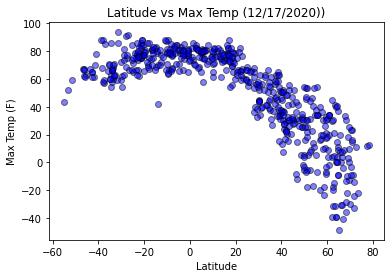

In [31]:
plt.scatter(pd.to_numeric(city_weather_df["Lat"]).astype(float), pd.to_numeric(city_weather_df["Max Temp"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Latitude vs Max Temp (12/17/2020))")
plt.show()

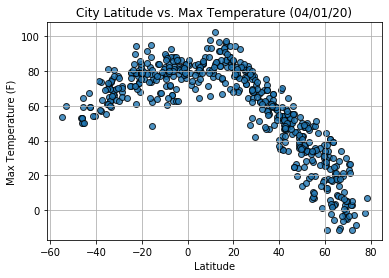

## Latitude vs. Humidity Plot

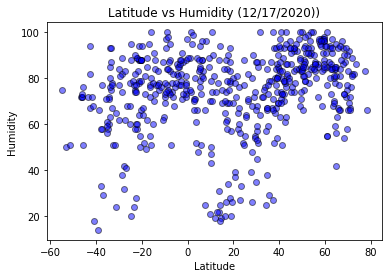

In [32]:
plt.scatter(pd.to_numeric(city_weather_df["Lat"]).astype(float), pd.to_numeric(city_weather_df["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity (12/17/2020))")
plt.show()

## Latitude vs. Cloudiness Plot

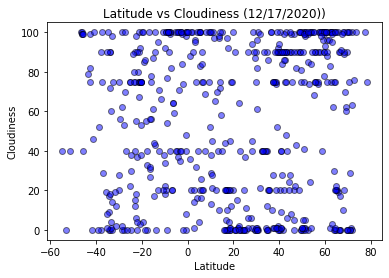

In [33]:
plt.scatter(pd.to_numeric(city_weather_df["Lat"]).astype(float), pd.to_numeric(city_weather_df["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness (12/17/2020))")
plt.show()

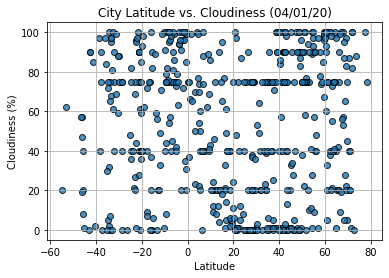

## Latitude vs. Wind Speed Plot

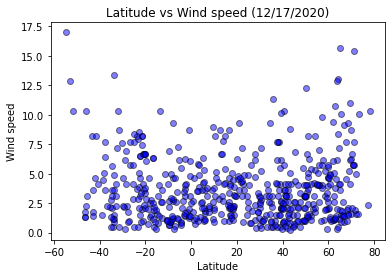

In [34]:
plt.scatter(pd.to_numeric(city_weather_df["Lat"]).astype(float), pd.to_numeric(city_weather_df["Wind speed"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.title(f"Latitude vs Wind speed (12/17/2020)")
plt.show()

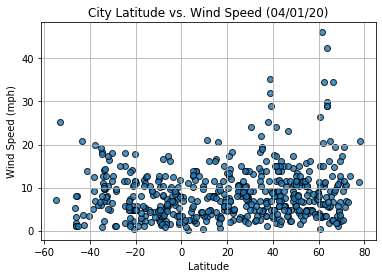

## Linear Regression

In [24]:
# need dataframes for Northern and Southern hemisphere data frame

north_df = city_weather_df.loc[]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


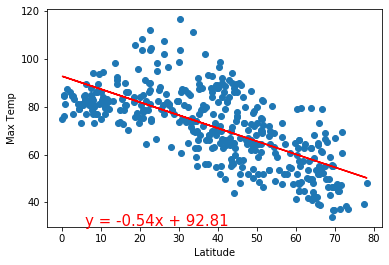

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


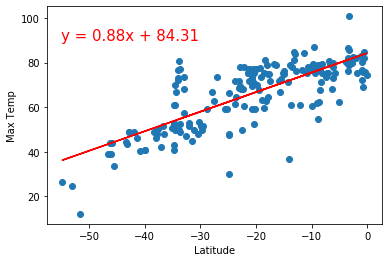

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


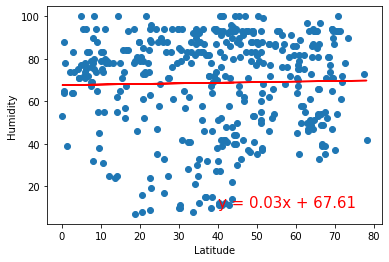

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


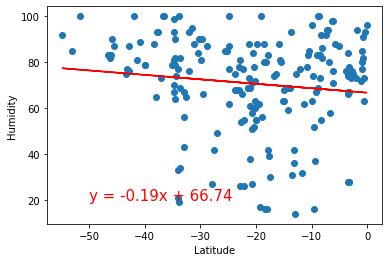

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


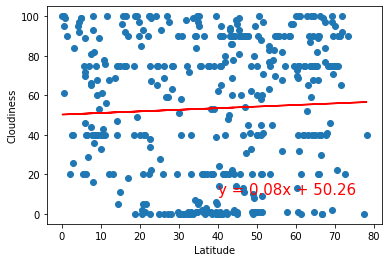

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


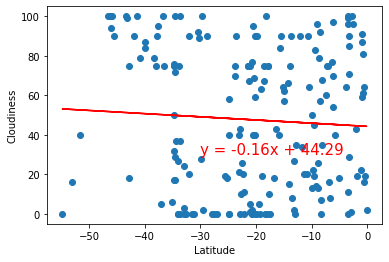

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


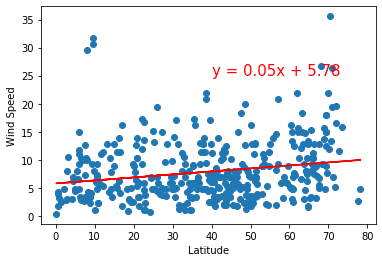

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


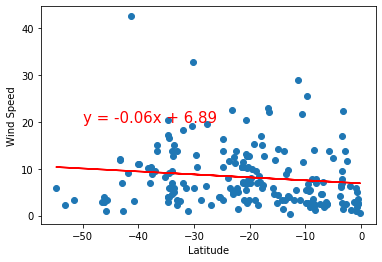